In [2]:
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
import numpy as np
import pandas as pd
from coffea.util import load
import hist
import os
from pprint import pprint 
hep.style.use(hep.style.ROOT)

In [3]:
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/DataPlots/Zee_Run2018D/"

In [4]:
input_folder_must = "/eos/user/r/rdfexp/ecal/cluster/raw_files/EGamma/Dumper_Mustache_bugFix/220919_211119"
input_folder_deep = "/eos/user/r/rdfexp/ecal/cluster/raw_files/EGamma/Dumper_DeepSC_algoA_bugFix/220919_211359"

In [5]:
dfM = uproot.lazy([f"{input_folder_must}/0000/output_1*.root:recosimdumper/caloTree",
                  ], num_workers=2)
dfD = uproot.lazy([f"{input_folder_deep}/0000/output_1*.root:recosimdumper/caloTree",
                  ],num_workers=2)

In [14]:
dfD.fields

['eventId',
 'lumiId',
 'runId',
 'rho',
 'nVtx',
 'pfCluster_rawEnergy',
 'pfCluster_rawEnergyUncalib',
 'pfCluster_energy',
 'pfCluster_rawPt',
 'pfCluster_pt',
 'pfCluster_eta',
 'pfCluster_phi',
 'pfCluster_ieta',
 'pfCluster_iphi',
 'pfCluster_iz',
 'pfCluster_nXtals',
 'pfCluster_superClustersIndex',
 'patMET_sumEt',
 'patMET_et',
 'mll',
 'patElectron_index',
 'patElectron_seedRawId',
 'patElectron_classification',
 'patElectron_nPFClusters',
 'patElectron_charge',
 'patElectron_isEB',
 'patElectron_isEE',
 'patElectron_eta',
 'patElectron_phi',
 'patElectron_p',
 'patElectron_pt',
 'patElectron_pIn',
 'patElectron_pOut',
 'patElectron_pAtCalo',
 'patElectron_deltaEtaIn',
 'patElectron_deltaPhiIn',
 'patElectron_deltaEtaSeedClusterAtCalo',
 'patElectron_deltaPhiSeedClusterAtCalo',
 'patElectron_deltaEtaEleClusterAtCalo',
 'patElectron_deltaPhiEleClusterAtCalo',
 'patElectron_misHits',
 'patElectron_nAmbiguousGsfTracks',
 'patElectron_fbrem',
 'patElectron_energy',
 'patElectron_

(array([1.2100e+02, 9.6700e+02, 1.1133e+04, 1.8086e+04, 1.1284e+04,
        4.2740e+03, 6.1600e+02, 9.5000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 1. ,  8.4, 15.8, 23.2, 30.6, 38. , 45.4, 52.8, 60.2, 67.6, 75. ]),
 <BarContainer object of 10 artists>)

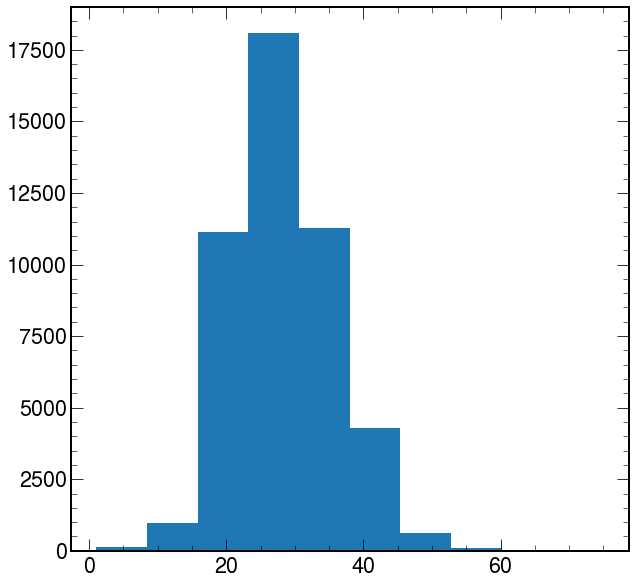

In [13]:
plt.hist(dfD.nVtx)

In [ ]:
df.fields

In [13]:
dfM = dfM[0:230000]
dfD = dfD[0:230000]

In [14]:
def plot_comparison(dfB, dfA, var, label, bins, xrange, output_folder, 
                    ylog=False, wA=None, wB=None, flatten=False,density=True):
    
    fig = plt.figure(figsize=(10,11), dpi=72)
    gs = fig.add_gridspec(2,1, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)
    
    ax =  axs[0]
    axr =  axs[1]
    
    if flatten:
        dfA = ak.flatten(dfA)
        dfB = ak.flatten(dfB)
    
    B, binX, _ = ax.hist(dfB, bins=bins, range=xrange,  weights=wB,
                         label="Mustache", histtype="step", linewidth=2, density=density)
    A, binX, _ = ax.hist(dfA, bins=bins, range=xrange, weights=wA,
                         label="DeepSC", histtype="step", linewidth=2, density=density)
    
    if density:
        errA,_ = np.histogram(dfA, bins=bins, range=xrange, weights=wA)
        errB,_ = np.histogram(dfB, bins=bins, range=xrange, weights=wB)

    ax.legend()
    axr.set_xlabel(label)
    hep.cms.label(rlabel="Run2018D Zee skim", loc=0, ax=ax)
    mmax = max([max(A), max(B)])
    if ylog:
        ax.set_ylim(max([min(A), min(B),1e-3]), mmax*500)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, mmax*1.4)


    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    ratio= np.where( (A>0)&(B>0),
                     A/B,
                     1.) 
    
    centers = (np.roll(binX, -1) + binX)/2
 
    axr.errorbar(centers[:-1], ratio, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1, c="black")

    deltaMax = np.max(ratio)
    deltaMin = np.min(ratio)

    #print(deltaM)
    axr.set_ylim(max(0, deltaMin*0.8), deltaMax*1.2)
    axr.set_ylabel("D/M")
    axr.grid(which="both",axis="y")
    axr.plot([binX[0], binX[-1]], [1.,1.], linewidth=2, c="black")

    if output_folder!=None:
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + f"/{var}_comparison.png")
        fig.savefig(output_folder + f"/{var}_comparison.pdf")
        fig.savefig(output_folder + f"/{var}_comparison.svg")
    


In [175]:
dfD

<Array [{eventId: 20145706, lumiId: 47, ... ] type='170000 * {"eventId": int64, ...'>

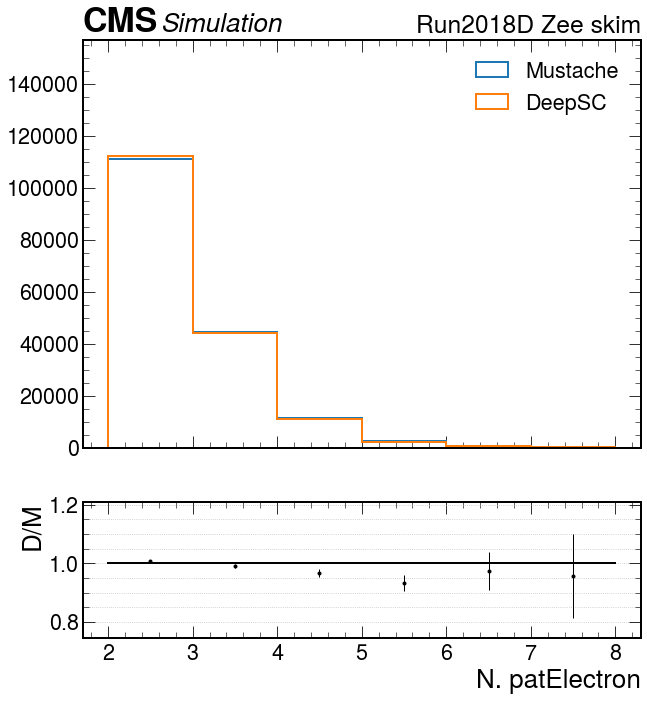

In [9]:
plot_comparison(ak.num(dfM.patElectron_pt), ak.num(dfD.patElectron_pt),
                label="N. patElectron", var="N_pat_electron", bins=6, xrange=(2,8),
                output_folder=output_folder)

/tmp/ipykernel_520/3270670231.py:31: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_520/3270670231.py:31: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_520/3270670231.py:31: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_520/3270670231.py:34: RuntimeWarning: invalid value encountered in true_divide
  A/B,


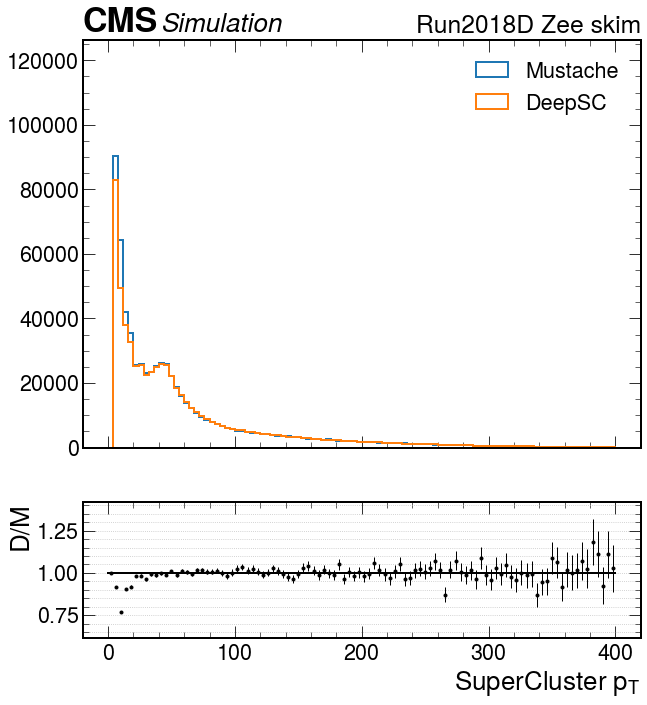

In [10]:
plot_comparison(dfM.superCluster_energy, dfD.superCluster_energy,
                label="SuperCluster $p_T$", var="SC_pt", 
                bins=100, xrange=(0,400), flatten=True,
                output_folder=output_folder)

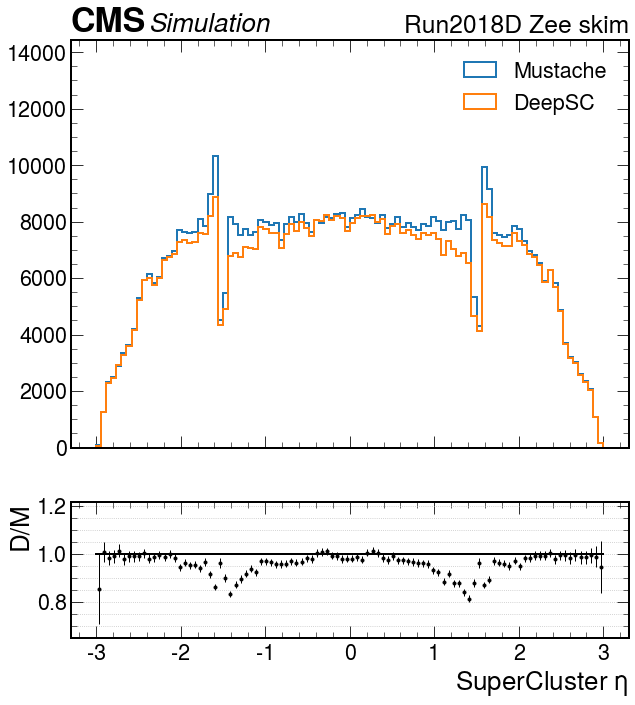

In [11]:
plot_comparison(dfM.superCluster_eta, dfD.superCluster_eta,
                label="SuperCluster $\eta$", var="SC_eta", 
                bins=100, xrange=(-3,3), flatten=True,
                output_folder=output_folder)

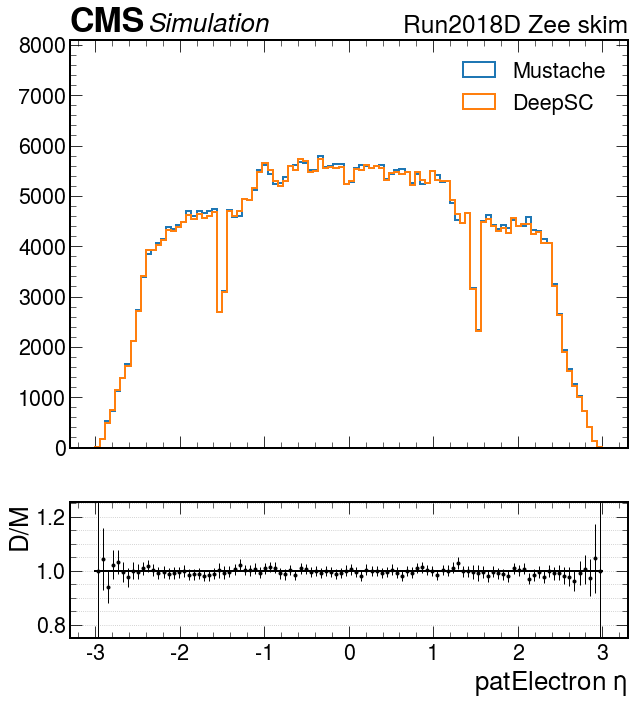

In [12]:
plot_comparison(dfM.patElectron_eta, dfD.patElectron_eta,
                label="patElectron $\eta$", var="patElectron_eta", 
                bins=100, xrange=(-3,3), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_pt, dfD.patElectron_pt,
                label="patElectron $p_T$", var="patElectron_pt", 
                bins=100, xrange=(0.,200), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_et, dfD.patElectron_et,
                label="patElectron $E_T$", var="patElectron_et", 
                bins=100, xrange=(0.,100), flatten=True,
                output_folder=output_folder)

/tmp/ipykernel_520/3270670231.py:31: RuntimeWarning: divide by zero encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_520/3270670231.py:31: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_520/3270670231.py:31: RuntimeWarning: invalid value encountered in true_divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_520/3270670231.py:34: RuntimeWarning: invalid value encountered in true_divide
  A/B,


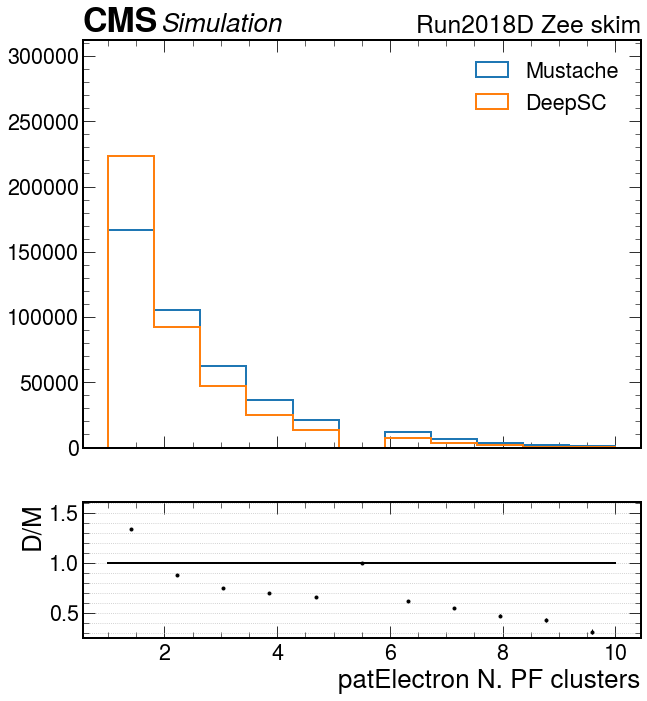

In [14]:
plot_comparison(dfM.patElectron_nPFClusters, dfD.patElectron_nPFClusters,
                label="patElectron N. PF clusters", var="N_pf_clusters", 
                bins=11, xrange=(1.,10), flatten=True,
                output_folder=output_folder)

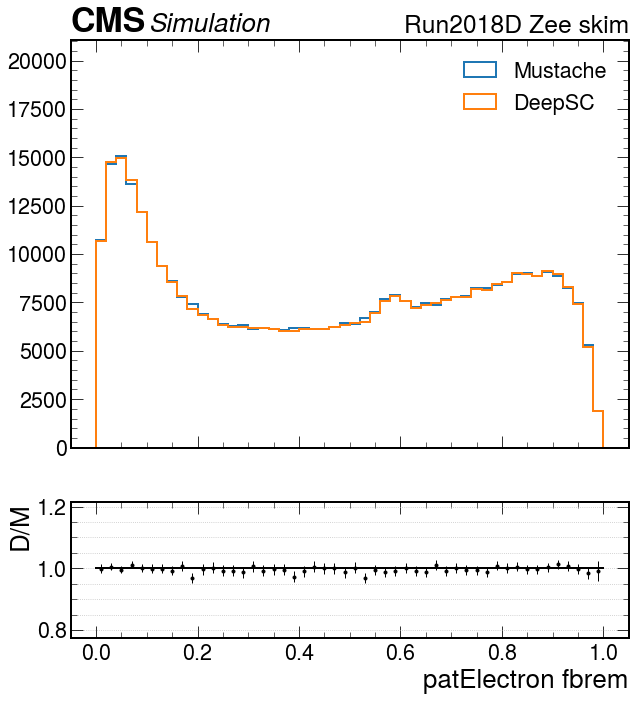

In [15]:
plot_comparison(dfM.patElectron_fbrem, dfD.patElectron_fbrem,
                label="patElectron fbrem", var="fbrem", 
                bins=50, xrange=(0.,1.), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_refinedSCEnergy, dfD.patElectron_refinedSCEnergy,
                label="patElectron RefinedSC Energy", var="patEle_refinedSC_en", 
                bins=50, xrange=(0.,100.), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_full5x5_refinedSCR9, dfD.patElectron_full5x5_refinedSCR9,
                label="patElectron full5x5 refinedSCR9", var="patElectron_full5x5_refinedSCR9", 
                bins=50, xrange=(0.,2.), flatten=True, ylog=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_deltaEtaSeedClusterAtCalo, dfD.patElectron_deltaEtaSeedClusterAtCalo,
                label="patElectron deltaEtaSeedClusterAtCalo", var="patEle_deltaEtaSeedClusterAtCalo", 
                bins=100, xrange=(-0.15,0.15), flatten=True,ylog=True,
                output_folder=output_folder)

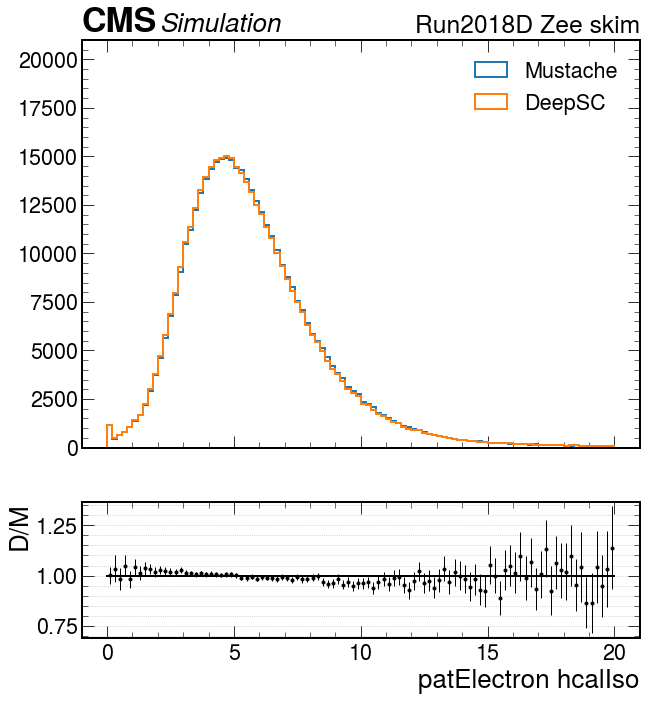

In [16]:
plot_comparison(dfM.patElectron_hcalIso, dfD.patElectron_hcalIso,
                label="patElectron hcalIso", var="patEle_hcalIso", 
                bins=100, xrange=(0.,20.), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_ecalIso, dfD.patElectron_ecalIso,
                label="patElectron ecalIso", var="patEle_ecalIso", 
                bins=100, xrange=(0.,15.), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_pfPhotonIso, dfD.patElectron_pfPhotonIso,
                label="patElectron pfPhotonIso", var="patElectron_pfPhotonIso", 
                bins=100, xrange=(0.,15.), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_classification, dfD.patElectron_classification,
                label="patElectron classification", var="patElectron_classification", 
                bins=5, xrange=(0.,5.), flatten=True,
                output_folder=output_folder)

In [ ]:
plot_comparison(dfM.patElectron_trkIso, dfD.patElectron_trkIso,
                label="patElectron trkIso", var="patElectron_trkIso", 
                bins=50, xrange=(0.,5.), flatten=True,
                output_folder=output_folder)

# Coffea analsysis plotting

### Basic cleaning

In [18]:
list(filter(lambda k:"patElectron" in k,dfD.fields))

['patElectron_index',
 'patElectron_seedRawId',
 'patElectron_classification',
 'patElectron_nPFClusters',
 'patElectron_charge',
 'patElectron_isEB',
 'patElectron_isEE',
 'patElectron_eta',
 'patElectron_phi',
 'patElectron_p',
 'patElectron_pt',
 'patElectron_pIn',
 'patElectron_pOut',
 'patElectron_pAtCalo',
 'patElectron_deltaEtaIn',
 'patElectron_deltaPhiIn',
 'patElectron_deltaEtaSeedClusterAtCalo',
 'patElectron_deltaPhiSeedClusterAtCalo',
 'patElectron_deltaEtaEleClusterAtCalo',
 'patElectron_deltaPhiEleClusterAtCalo',
 'patElectron_misHits',
 'patElectron_nAmbiguousGsfTracks',
 'patElectron_fbrem',
 'patElectron_energy',
 'patElectron_energyErr',
 'patElectron_ecalEnergy',
 'patElectron_ecalEnergyErr',
 'patElectron_et',
 'patElectron_mt',
 'patElectron_dphiMET',
 'patElectron_refinedSCEta',
 'patElectron_refinedSCPhi',
 'patElectron_refinedSCEnergy',
 'patElectron_refinedSCRawEnergy',
 'patElectron_refinedSCESEnergy',
 'patElectron_refinedSCEt',
 'patElectron_refinedSCPhiWid

In [21]:
isoD =(dfD.patElectron_trkIso + dfD.patElectron_ecalIso + \
    dfD.patElectron_hcalIso)/dfD.patElectron_pt

isoM =(dfM.patElectron_trkIso + dfM.patElectron_ecalIso + \
    dfM.patElectron_hcalIso)/dfM.patElectron_pt

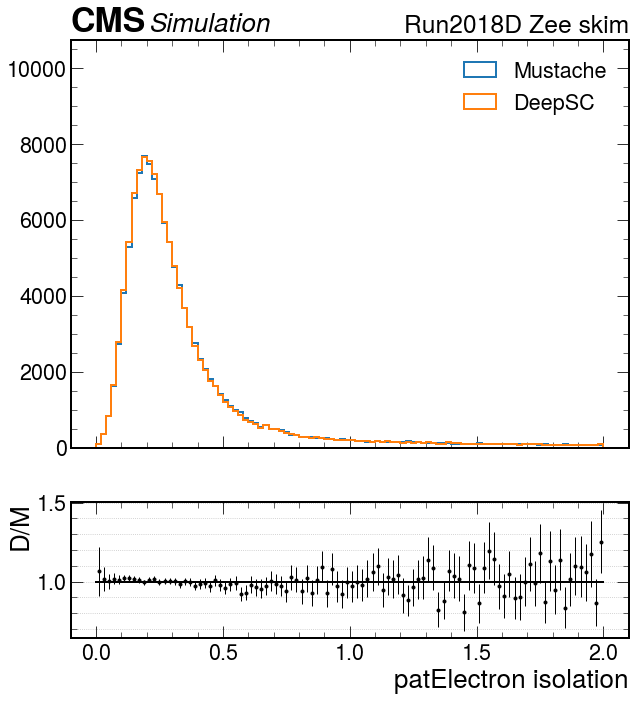

In [85]:
plot_comparison(isoM[dfM.patElectron_eta<1.5], isoD[dfD.patElectron_eta<1.5],
                label="patElectron isolation", var="patElectron_isoTot", 
                bins=100, xrange=(0.,2), flatten=True,
                output_folder=output_folder)

In [15]:
mask_class_M = (dfM.patElectron_classification==0)&(dfM.patElectron_refinedSCEt > 20)
mask_class_D = (dfD.patElectron_classification==0)&(dfD.patElectron_refinedSCEt > 20)
mask_EB_M = (abs(dfM.patElectron_eta)<=1.5)&(abs(dfM.patElectron_refinedSCSigmaIEtaIEta)<0.01)
mask_EB_D = (abs(dfD.patElectron_eta)<=1.5)&(abs(dfD.patElectron_refinedSCSigmaIEtaIEta)<0.01)
mask_EE_M = (abs(dfM.patElectron_eta)>1.5)&(abs(dfM.patElectron_refinedSCSigmaIEtaIEta)<0.03)
mask_EE_D = (abs(dfD.patElectron_eta)>1.5)&(abs(dfD.patElectron_refinedSCSigmaIEtaIEta)<0.03)

In [ ]:
plot_comparison(isoM[mask_class_M & mask_EB_M], 
                isoD[mask_class_D & mask_EB_D],
                label="patElectron isolation [golden]", var="patElectron_isoTot_golden", 
                bins=50, xrange=(0.,1.), flatten=True,
                output_folder=output_folder)

# Z 4 momentum


In [16]:
import vector
vector.register_awkward()

## Selecting good electrons with cut based ID and golden selection/

In [17]:
patEle_fields= list(filter(lambda k:"patElectron" in k,dfM.fields))

In [68]:
with open("patElectron_fields.txt","w") as o:
    for p in patEle_fields:
        o.write(f"{p}\n")

In [67]:
patEle_fields

['patElectron_index',
 'patElectron_seedRawId',
 'patElectron_classification',
 'patElectron_nPFClusters',
 'patElectron_charge',
 'patElectron_isEB',
 'patElectron_isEE',
 'patElectron_eta',
 'patElectron_phi',
 'patElectron_p',
 'patElectron_pt',
 'patElectron_pIn',
 'patElectron_pOut',
 'patElectron_pAtCalo',
 'patElectron_deltaEtaIn',
 'patElectron_deltaPhiIn',
 'patElectron_deltaEtaSeedClusterAtCalo',
 'patElectron_deltaPhiSeedClusterAtCalo',
 'patElectron_deltaEtaEleClusterAtCalo',
 'patElectron_deltaPhiEleClusterAtCalo',
 'patElectron_misHits',
 'patElectron_nAmbiguousGsfTracks',
 'patElectron_fbrem',
 'patElectron_energy',
 'patElectron_energyErr',
 'patElectron_ecalEnergy',
 'patElectron_ecalEnergyErr',
 'patElectron_et',
 'patElectron_mt',
 'patElectron_dphiMET',
 'patElectron_refinedSCEta',
 'patElectron_refinedSCPhi',
 'patElectron_refinedSCEnergy',
 'patElectron_refinedSCRawEnergy',
 'patElectron_refinedSCESEnergy',
 'patElectron_refinedSCEt',
 'patElectron_refinedSCPhiWid

In [20]:
golden_ele_mask_M = (dfM.patElectron_egmCutBasedElectronIDloose==1)&\
                    (dfM.patElectron_classification==0)&(dfM.patElectron_refinedSCEt > 20)
golden_ele_mask_D = (dfD.patElectron_egmCutBasedElectronIDloose==1)&\
                    (dfD.patElectron_classification==0)&(dfD.patElectron_refinedSCEt > 20)

In [63]:
id_ele_mask_M = (dfM.patElectron_egmCutBasedElectronIDloose==1)
id_ele_mask_D = (dfD.patElectron_egmCutBasedElectronIDloose==1)


In [21]:
dict_M = {k.split("_")[1]: dfM[k] for k in patEle_fields}
electrons_M = ak.zip( dict_M, with_name="Momentum4D")

dict_D = {k.split("_")[1]: dfD[k] for k in patEle_fields}
electrons_D = ak.zip( dict_D, with_name="Momentum4D")

In [130]:
ak.sum(golden_ele_mask_M)

61825

In [131]:
ak.sum(golden_ele_mask_D)

91916

In [23]:
ele_gold_M = electrons_M[golden_ele_mask_M]
ele_gold_D = electrons_D[golden_ele_mask_D]
ele_gold_M = ele_gold_M[ak.num(ele_gold_M)>=2]
ele_gold_D = ele_gold_D[ak.num(ele_gold_D)>=2]

Z_M = ele_gold_M[:,0] + ele_gold_M[:,1]
Z_D = ele_gold_D[:,0] + ele_gold_D[:,1]

In [137]:
ak.num(Z_M, axis=0)

<Record ... phi: 5762, eta: 5762, t: 5762} type='{"rho": int64, "phi": int64, "e...'>

In [33]:
ak.std(Z_M.mass[(Z_M.mass>80)&(Z_M.mass<100)]), ak.mean(Z_M.mass[(Z_M.mass>80)&(Z_M.mass<100)])

(3.8025285013094554, 90.6067406098333)

In [32]:
ak.std(Z_D.mass[(Z_D.mass>80)&(Z_D.mass<100)]), ak.mean(Z_D.mass[(Z_D.mass>80)&(Z_D.mass<100)])

(3.8984653526235498, 90.4586922611287)

(array([[1., 1., 1., ..., 2., 1., 0.],
        [0., 0., 1., ..., 1., 3., 0.],
        [1., 0., 0., ..., 2., 4., 1.],
        ...,
        [0., 0., 4., ..., 0., 1., 0.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 2., 0., ..., 3., 4., 1.]]),
 array([ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
         81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
         92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
        103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
        114., 115., 116., 117., 118., 119., 120.]),
 array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
        -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
        -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
         0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
         1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,  2.16,  2.28,
         2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  

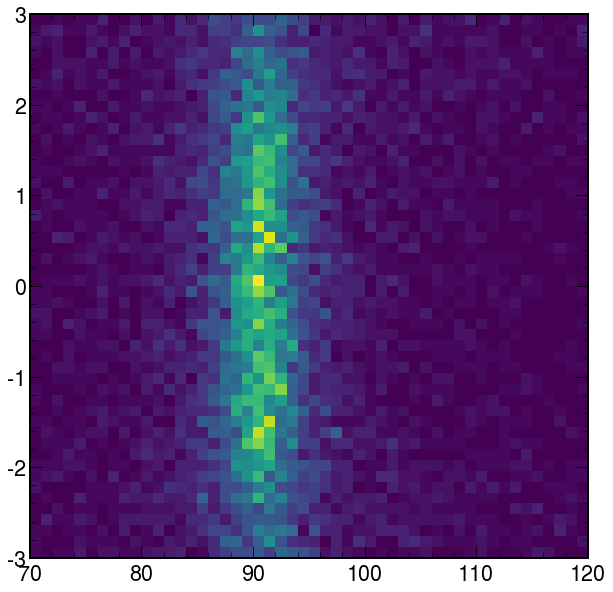

In [38]:
plt.hist2d(Z_D.mass, Z_D.eta, bins=50, range=((70,120), (-3,3)))

(array([[0., 8., 5., ..., 0., 0., 0.],
        [2., 1., 3., ..., 1., 0., 0.],
        [1., 5., 9., ..., 0., 0., 0.],
        ...,
        [0., 2., 3., ..., 0., 0., 0.],
        [0., 3., 4., ..., 0., 0., 0.],
        [1., 4., 1., ..., 0., 0., 0.]]),
 array([ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
         81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
         92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
        103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
        114., 115., 116., 117., 118., 119., 120.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <matplotlib.collections.QuadMesh at 0x7f4acdec5e80>)

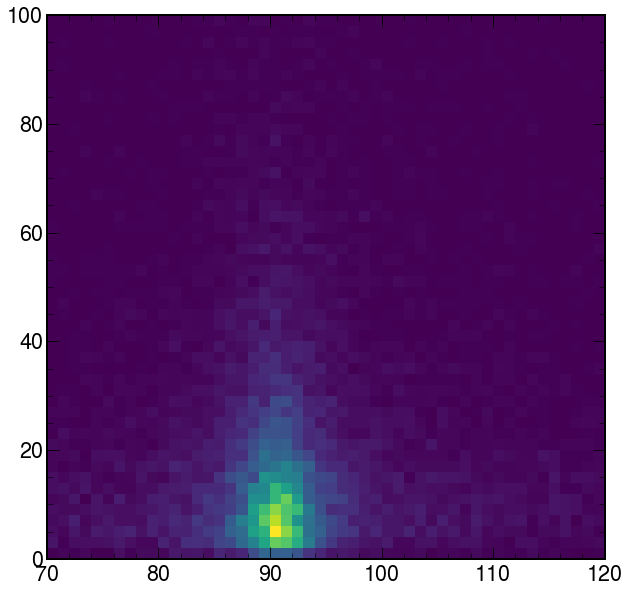

In [36]:
plt.hist2d(Z_D.mass, Z_D.pt, bins=50, range=((70,120), (0,100)))

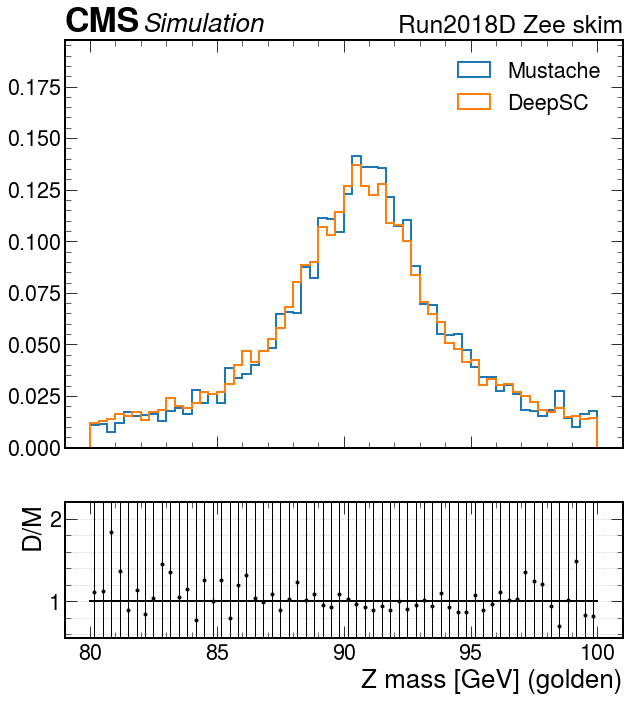

In [62]:
plot_comparison(Z_M.mass, Z_D.mass,
                label="Z mass [GeV] (golden)", var="Z_mass_golder", 
                bins=60, xrange=(80.,100.),density=True,  
                output_folder=output_folder)

In [65]:
ele_goodId_M = electrons_M[id_ele_mask_M]
ele_goodId_D = electrons_D[id_ele_mask_D]
ele_goodId_M = ele_goodId_M[ak.num(ele_goodId_M)>=2]
ele_goodId_D = ele_goodId_D[ak.num(ele_goodId_D)>=2]

Z_M2 = ele_goodId_M[:,0] + ele_goodId_M[:,1]
Z_D2 = ele_goodId_D[:,0] + ele_goodId_D[:,1]

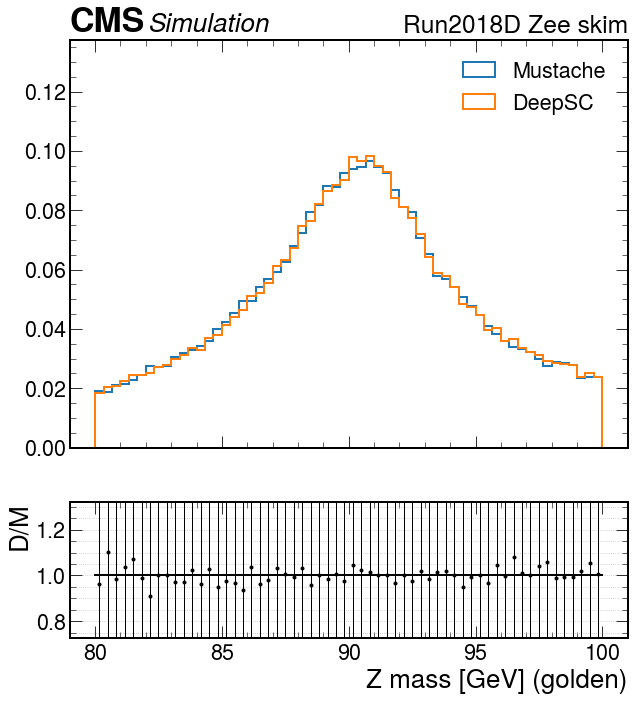

In [66]:
plot_comparison(Z_M2.mass, Z_D2.mass,
                label="Z mass [GeV] (golden)", var="Z_mass_onlyId", 
                bins=60, xrange=(80.,100.),density=True, 
                output_folder=output_folder)

# Trying with coffea

In [57]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.nanoevents.schema import auto_schema

fname = f"{input_folder_must}/0000/output_100.root"
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=schema.auto_schema, treepath="recosimdumper/caloTree",
    metadata={"dataset": "DYJets"},
).events()



ModuleNotFoundError: No module named 'coffea.nanoevents.schema'

In [54]:
events

AttributeError: no field named 'run'

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/awkward/highlevel.py#L1855)

In [51]:
events.fields

['eventId',
 'lumiId',
 'runId',
 'rho',
 'nVtx',
 'pfCluster_rawEnergy',
 'pfCluster_rawEnergyUncalib',
 'pfCluster_energy',
 'pfCluster_rawPt',
 'pfCluster_pt',
 'pfCluster_eta',
 'pfCluster_phi',
 'pfCluster_ieta',
 'pfCluster_iphi',
 'pfCluster_iz',
 'pfCluster_nXtals',
 'pfCluster_superClustersIndex',
 'patMET_sumEt',
 'patMET_et',
 'mll',
 'patElectron_index',
 'patElectron_seedRawId',
 'patElectron_classification',
 'patElectron_nPFClusters',
 'patElectron_charge',
 'patElectron_isEB',
 'patElectron_isEE',
 'patElectron_eta',
 'patElectron_phi',
 'patElectron_p',
 'patElectron_pt',
 'patElectron_pIn',
 'patElectron_pOut',
 'patElectron_pAtCalo',
 'patElectron_deltaEtaIn',
 'patElectron_deltaPhiIn',
 'patElectron_deltaEtaSeedClusterAtCalo',
 'patElectron_deltaPhiSeedClusterAtCalo',
 'patElectron_deltaEtaEleClusterAtCalo',
 'patElectron_deltaPhiEleClusterAtCalo',
 'patElectron_misHits',
 'patElectron_nAmbiguousGsfTracks',
 'patElectron_fbrem',
 'patElectron_energy',
 'patElectron_

In [ ]:
2